<div align="center"><h1> Convolutional Neural Nets </h1></div>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Filtering

In [0]:
!pip install opencv-contrib-python-headless

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [0]:
def apply_filer(img, filter):
    oimg = cv2.filter2D(img, -1, filter)
    return oimg

### Detection using filters

We already know that we can use filters to detect arbitarily complex shapes.  
Let's take the example of a square detector.

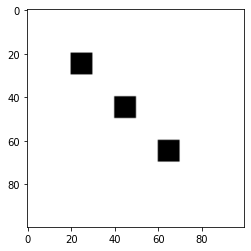

In [4]:
img = np.ones((100,100))
for i in range(1,4):
    img[i*20:i*20+10, i*20:i*20+10] = 0

plt.imshow(img, cmap="gray")


In [5]:
# all_zeros = np.zeros((11,11))
square_detector = -np.ones((11,11))
square_detector[-1, :] = 1
square_detector[0, :] = 1
square_detector[:, -1] = 1
square_detector[:, 0] = 1
square_detector

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

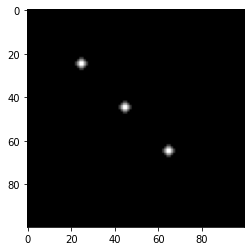

In [6]:
oimg = apply_filer(img, square_detector)
oimg = oimg * (oimg>0)
plt.imshow(oimg, cmap="gray")

### Heirarchical Features

Another approach to solve the above problem is to use very simple filters and then use the information captured by each of them using another simple filter, to finally get the desired output.

In [7]:
verticle_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
verticle_filter

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

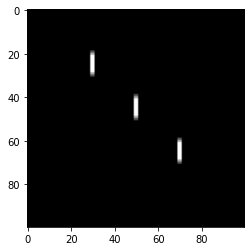

In [8]:
oimg1 = apply_filer(img, verticle_filter)
oimg1 = oimg1 * (oimg1 >=0)
plt.imshow(oimg1, cmap="gray")

In [9]:
horizontal_filter = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
horizontal_filter

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

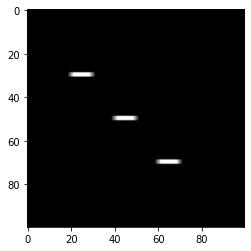

In [10]:
oimg2 = apply_filer(img, horizontal_filter)
oimg2 = oimg2 * (oimg2 >=0)
plt.imshow(oimg2, cmap="gray")

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


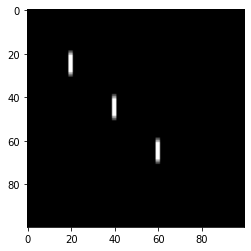

In [11]:
verticle_filter = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
print(verticle_filter)
oimg3 = apply_filer(img, verticle_filter)
oimg3 = oimg3 * (oimg3 >=0)
plt.imshow(oimg3, cmap="gray")

(100, 100, 3)

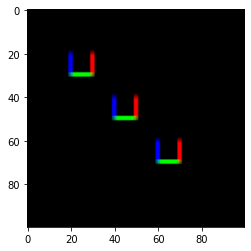

In [12]:
fimg = np.dstack((oimg1/oimg1.max(), oimg2/oimg2.max(), oimg3/oimg3.max()))
plt.imshow(fimg)
fimg.shape

**Filter for bottom right corner detection**

*R channel*
$$
\begin{pmatrix}
-1 & 1 & 0 \\
-1 & 0 & 0 \\
-1 & -1 & -1
\end{pmatrix}
$$

*G channel*
$$
\begin{pmatrix}
-1 & -1 & -1 \\
1 & 0 & -1 \\
0 & 0 & -1
\end{pmatrix}
$$

*B channel*
$$
\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}
$$

[[-1. -1. -1.]
 [ 1.  0. -1.]
 [ 0.  0. -1.]]


(100, 100)

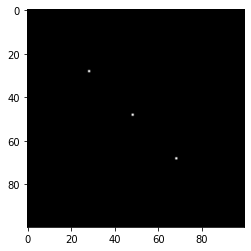

In [13]:
corner_filter = np.zeros((3,3,3))
corner_filter[:,0,0] = -1
corner_filter[2,:,0] = -1
corner_filter[0,1,0] = 1

corner_filter[0,:,1] = -1
corner_filter[:,2,1] = -1
corner_filter[1,0,1] = 1
print(corner_filter[:, :, 1])


ffimg = np.zeros((fimg.shape[0], fimg.shape[1]))
for i in range(fimg.shape[0]-2):
    for j in range(fimg.shape[1]-2):
        ffimg[i, j] = np.sum(fimg[i:i+3, j:j+3, :]*corner_filter)
            
ffimg = ffimg * (ffimg>0)
plt.imshow((ffimg-fimg.min())/(fimg.max()-fimg.min()), cmap="gray")
ffimg.shape

So if we use the information by the 3 filters together our detectors will be able to work better  


### Conclusion
1. We can have arbitarily complex filters to detect various features.
2. We can stack the filtered images to pass on more information to processes downstream

### Why we need CNNs? Why MLPs might be bad?

### Problems

### 1. MLPs get too big with too many parameters.

Let's say we have images of size 28*28 (MNIST). We use the following architecture on it. Roughly how many parameters are there?

![](./Pictures/mnist_mlp.png)

So basically, if we try to make the network even slightly deeper, we end up with too many params.  
Depth might be desirable due to heirarchy of features. But if there are too many params, then overfitting can happen.

![](./Pictures/goodfit.png)
![](./Pictures/overfit.png) 

### 2. MLPs are bad at capturing spatial relations.

$$
\begin{equation}
\begin{pmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8
\end{pmatrix} \rightarrow
\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8
\end{pmatrix}
\end{equation}
$$

## Solutions
What if we just learn the filters?

### Weight Sharing.
We don't have different weights for each input neuron. We are just learning the filters. So we are "sharing" weights between inputs.

![](./Pictures/conv.png)
### Pooling.
This helps in making features "position invariant". Let's say we are detecting a bird.  
We would like the head filter to give a high response to both the heads (even though they are flipped). Also, we want the full bird detector to give a high respnse for both the birds, even though they are completely flipped. 
![](./Pictures/bird.jpg)
![](./Pictures/max-pooling.png)

# General Architecture of CNNs

![](./Pictures/cnn.png)


The main thing to note here is that, we have fully connected layers at the end. Which is your basic MLP. So instead of directly flattening the input image and appling MLP on it, we are applying some "filters" (which are learned by the network), and then getting some "features" (Which are high level and position invariant). We use these "features" as input to a standard mlp. So CNNs are basically feature extractors.